In [43]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os
from datetime import datetime

In [44]:
# path = './data.json'
# data = {}
# with open(path, 'r') as f:
#     data = json.load(f)

path = './data.json'
data = {}
with open(path, 'r') as f:
    data = json.load(f)

In [72]:
data[26]

[{'contractID': 'SPY240131C00320000',
  'symbol': 'SPY',
  'expiration': '2024-01-31',
  'strike': '320.00',
  'type': 'call',
  'last': '167.63',
  'mark': '163.34',
  'bid': '162.75',
  'bid_size': '100',
  'ask': '163.93',
  'ask_size': '100',
  'volume': '0',
  'open_interest': '79',
  'date': '2024-01-31',
  'implied_volatility': '3.64657',
  'delta': '0.98783',
  'gamma': '0.00034',
  'theta': '-5.48394',
  'vega': '0.00799',
  'rho': '0.00859'},
 {'contractID': 'SPY240131P00320000',
  'symbol': 'SPY',
  'expiration': '2024-01-31',
  'strike': '320.00',
  'type': 'put',
  'last': '0.01',
  'mark': '0.01',
  'bid': '0.00',
  'bid_size': '0',
  'ask': '0.01',
  'ask_size': '10278',
  'volume': '4',
  'open_interest': '3877',
  'date': '2024-01-31',
  'implied_volatility': '2.47023',
  'delta': '-0.00058',
  'gamma': '0.00003',
  'theta': '-0.23259',
  'vega': '0.00052',
  'rho': '-0.00001'},
 {'contractID': 'SPY240131C00330000',
  'symbol': 'SPY',
  'expiration': '2024-01-31',
  's

In [73]:
data_ = []
for i in range(15): # 0-14
    obj = data[i] 
    if len(obj['data']) == 0:
        continue
    for obj2 in obj['data']:
        data_.append(obj2)

for i in range(15,27): # 15-26
    obj = data[i]
    for obj2 in obj:
        data_.append(obj2)

data = data_

In [74]:
# merge all sublists into one list
data, len(data)

([{'contractID': 'SPY240102C00402000',
   'symbol': 'SPY',
   'expiration': '2024-01-02',
   'strike': '402.00',
   'type': 'call',
   'last': '69.97',
   'mark': '70.77',
   'bid': '70.68',
   'bid_size': '100',
   'ask': '70.85',
   'ask_size': '100',
   'volume': '130',
   'open_interest': '1',
   'date': '2024-01-02',
   'implied_volatility': '1.24983',
   'delta': '0.99396',
   'gamma': '0.00055',
   'theta': '-1.17782',
   'vega': '0.00423',
   'rho': '0.01093'},
  {'contractID': 'SPY240102P00402000',
   'symbol': 'SPY',
   'expiration': '2024-01-02',
   'strike': '402.00',
   'type': 'put',
   'last': '0.02',
   'mark': '0.01',
   'bid': '0.00',
   'bid_size': '0',
   'ask': '0.01',
   'ask_size': '4204',
   'volume': '0',
   'open_interest': '303',
   'date': '2024-01-02',
   'implied_volatility': '1.04145',
   'delta': '-0.00135',
   'gamma': '0.00017',
   'theta': '-0.20807',
   'vega': '0.00110',
   'rho': '-0.00002'},
  {'contractID': 'SPY240102C00403000',
   'symbol': 'SPY

In [75]:
from decimal import Decimal, getcontext
getcontext().prec = 8

In [76]:
def get_stats(obj):
    exp_date = datetime.strptime(obj['expiration'], '%Y-%m-%d')
    curr_date = datetime.strptime(obj['date'], '%Y-%m-%d')
    tte = (exp_date - curr_date).days
    if(tte < 10):
        return None
    tau = Decimal(tte) / Decimal(365)
    delta = abs(float(obj['delta']))
    if(delta==1):
        delta = 0.999
    elif(delta==0):
        delta = 0.001
    IV = np.float64(obj['implied_volatility'])
    sigma = IV
    q = Decimal('0.01')
    N_inv = norm.ppf(delta * float(np.exp(float(q) * float(tau))))
    sigma = Decimal(sigma)
    m = (Decimal('0.5') * sigma**2 * tau) + (Decimal(N_inv) * sigma * Decimal(tau).sqrt())
    current_date = curr_date.strftime('%Y-%m-%d')
    expiry_date = exp_date.strftime('%Y-%m-%d')
    return [current_date, expiry_date, tte, tau, delta, IV, sigma, N_inv, m]

In [77]:
df = pd.DataFrame()
for option in data:
    stats = get_stats(option)
    if stats is not None:
        df = pd.concat([df, pd.DataFrame([stats])])

df.columns = ['date', 'expiration', 'tte', 'tau', 'delta', 'IV', 'sigma', 'N_inv', 'm']
print(df.shape)
df.head()

(134298, 9)


,date,expiration,tte,tau,delta,IV,sigma,N_inv,m
0,2024-01-02,2024-01-12,10,0.027397260,0.98683,0.84786,0.84785999999999994702903904908453114330768585...,2.229221,0.32269368
0,2024-01-02,2024-01-12,10,0.027397260,0.00078,0.58567,0.58567000000000002390976305832737125456333160...,-3.163204,-0.30194477
0,2024-01-02,2024-01-12,10,0.027397260,0.98590,0.81722,0.81721999999999994646060486047645099461078643...,2.202079,0.30701776
0,2024-01-02,2024-01-12,10,0.027397260,0.00082,0.56006,0.56006000000000000227373675443232059478759765625,-3.148617,-0.28758564
0,2024-01-02,2024-01-12,10,0.027397260,0.98555,0.77987,0.77986999999999995214494674655725248157978057...,2.192272,0.29132086


In [78]:
# for each day, for each pair of (m,tau,delta), calculate the average IV
df2 = df.groupby(['date', 'm', 'tau', 'delta'])['IV'].mean().reset_index()

In [79]:
df2.head(), len(df2)

(         date           m         tau    delta       IV
 0  2024-01-02  -1.4208084  0.96712329  0.00229  0.56570
 1  2024-01-02  -1.3404177  0.96712329  0.00271  0.54284
 2  2024-01-02  -1.2666456  0.96712329  0.00333  0.52531
 3  2024-01-02  -1.2483296   1.9643836  0.00784  0.42135
 4  2024-01-02  -1.2228215   1.4657534  0.00648  0.45869,
 120666)

In [80]:
# range of 'IV' values
df2['IV'].min(), df2['IV'].max()

(0.02963, 2.03914)

In [81]:
# get % of IV values >=1
(df2['IV'] >= 1).sum() *100 / len(df2)

0.2651948353305819

In [82]:
# drop all IV values >=1
df2 = df2[df2['IV'] < 1]

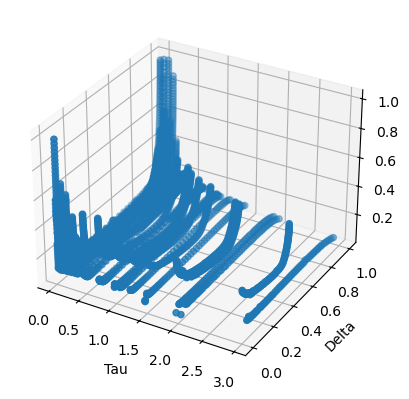

In [83]:
fig = plt.figure()
df3 = df2[df2['date'] == '2024-01-02']
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3['tau'], df3['delta'], df3['IV'])
ax.set_xlabel('Tau')
ax.set_ylabel('Delta')
ax.set_zlabel('IV')
plt.show()

# Dumas et al - DFW Regression Fitting

In [84]:
dates = df2['date'].unique()
dates

array(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
       '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
       '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24',
       '2024-01-25', '2024-01-26', '2024-01-29', '2024-01-30',
       '2024-01-31'], dtype=object)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
def fit_and_get_model_params(df):
    df['m_squared'] = df['m']**2
    df['tau_squared'] = df['tau']**2
    df['m_tau'] = df['m'] * df['tau']
    X = df[['m', 'tau', 'm_squared', 'tau_squared', 'm_tau']]
    y = df['IV']
    model = LinearRegression()
    model.fit(X, y)
    return model

In [87]:
def predict(tau,m,model):
    m_squared = m**2
    tau_squared = tau**2
    m_tau = m * tau
    iv_ = max(.01, model.predict([[m, tau, m_squared, tau_squared, m_tau]])[0])
    return iv_

In [88]:
grid_tau = [x/365 for x in [10,30,60,91,122,152,182,273,365,547,730]]
grid_m = [np.log(m) for m in [0.6, 0.8, 0.9, 0.95, 0.975, 1, 1.025, 1.05, 1.1, 1.2, 1.3, 1.5, 1.75, 2]]

In [89]:
# create a new df to store the predicted IV, we train a model for each day and predict the IV for each pair of (m,tau) for that day
predicted_iv = pd.DataFrame()
for date in dates:
    df3 = df2[df2['date'] == date]
    model = fit_and_get_model_params(df3)
    for tau in grid_tau:
        for m in grid_m:
            iv_ = predict(tau,m,model)
            predicted_iv = pd.concat([predicted_iv, pd.DataFrame([[date, tau, m, iv_]])])

/tmp/ipykernel_38144/4262880829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['m_squared'] = df['m']**2
/tmp/ipykernel_38144/4262880829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tau_squared'] = df['tau']**2
/tmp/ipykernel_38144/4262880829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [90]:
# set column names
predicted_iv.columns = ['date', 'tau', 'm', 'IV']

In [91]:
predicted_iv.head()

,date,tau,m,IV
0,2024-01-02,0.027397,-0.510826,0.337169
0,2024-01-02,0.027397,-0.223144,0.223939
0,2024-01-02,0.027397,-0.105361,0.210374
0,2024-01-02,0.027397,-0.051293,0.210528
0,2024-01-02,0.027397,-0.025318,0.212029


In [92]:
predicted_iv['tau'].unique(), predicted_iv['m'].unique(), predicted_iv['IV'].min(), predicted_iv['IV'].max()

(array([0.02739726, 0.08219178, 0.16438356, 0.24931507, 0.33424658,
        0.41643836, 0.49863014, 0.74794521, 1.        , 1.49863014,
        2.        ]),
 array([-0.51082562, -0.22314355, -0.10536052, -0.05129329, -0.02531781,
         0.        ,  0.02469261,  0.04879016,  0.09531018,  0.18232156,
         0.26236426,  0.40546511,  0.55961579,  0.69314718]),
 0.11734393407785598,
 0.776836259156145)

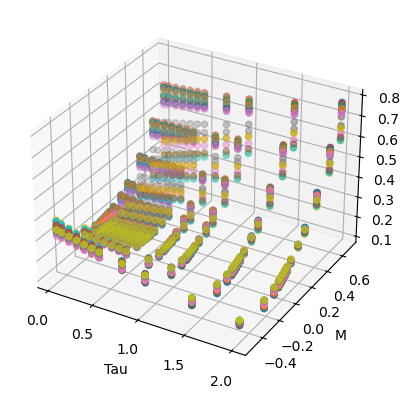

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for date in dates:
    df3 = predicted_iv[predicted_iv['date'] == date]
    ax.scatter(df3['tau'], df3['m'], df3['IV'])
ax.set_xlabel('Tau')
ax.set_ylabel('M')
ax.set_zlabel('IV')
plt.show()

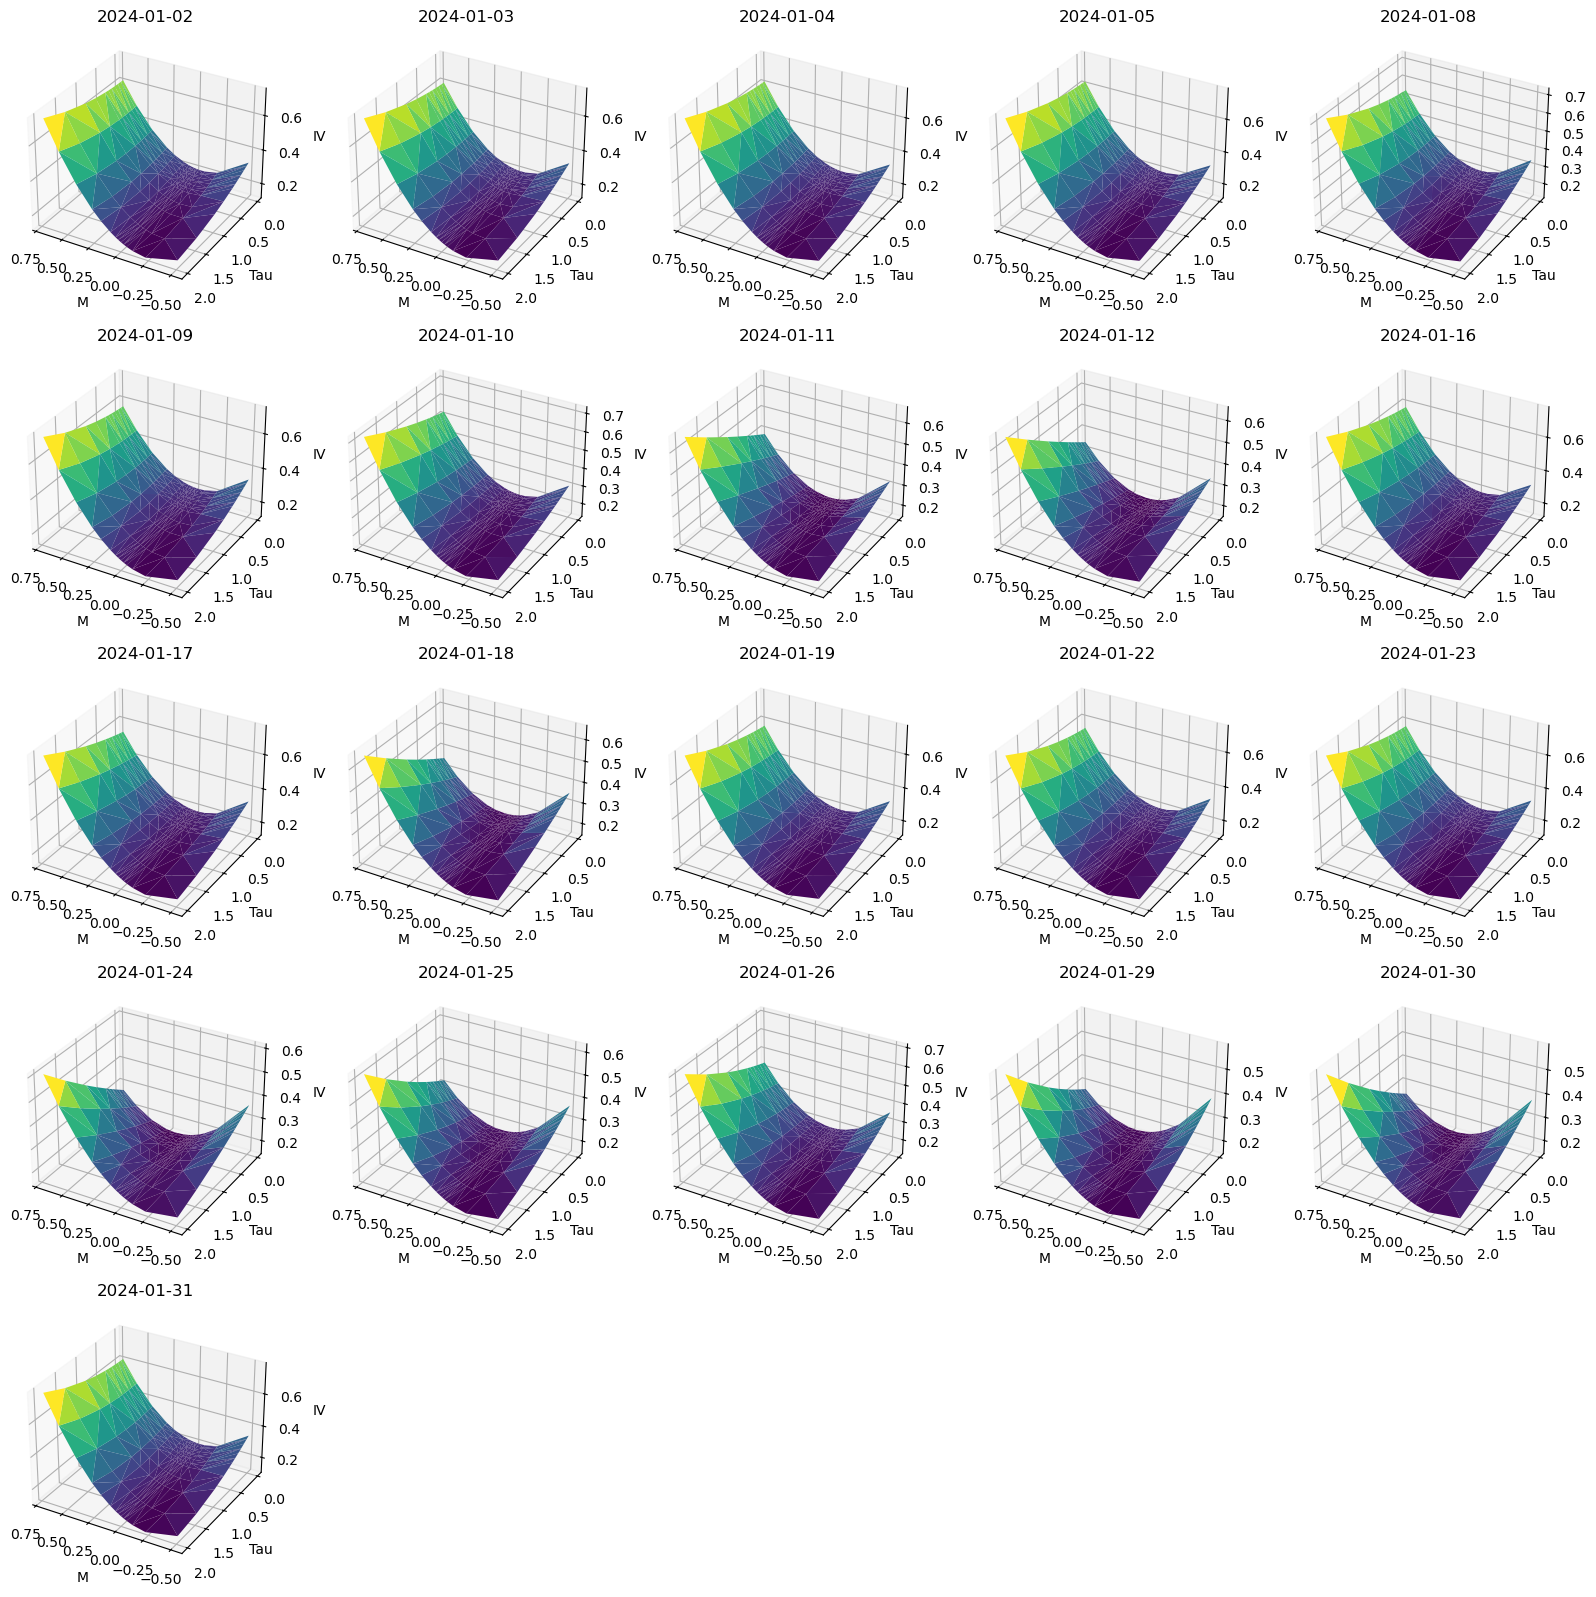

In [95]:
fig = plt.figure(figsize=(20,20))
for i, date in enumerate(dates):
    df3 = predicted_iv[predicted_iv['date'] == date]
    ax = fig.add_subplot(5, 5, i+1, projection='3d')
    ax.plot_trisurf(df3['m'], df3['tau'], df3['IV'], cmap='viridis')
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_title(date)
    ax.set_xlabel('M')
    ax.set_ylabel('Tau')
    ax.set_zlabel('IV')
plt.show()

In [96]:
# save the predicted IV to a csv file
predicted_iv.to_csv('predicted_iv_new.csv', index=False)

# Extracting Features using PCA

$X_{t}(m, \tau) = \ln \bar{\sigma}_{t}(m, \tau), \ \text{where} \ \bar{\sigma}_{t}(m, \tau) \in \bar{\Sigma}_{t}$

$U_{t}(m, \tau) = \ln \bar{\sigma}_{t}(m, \tau) - \ln \bar{\sigma}_{t-1}(m, \tau) \, \text{for} \, (m, \tau) \in \mathcal{I}_0.$


**We perform PCA on** $\{U_{t}(m, \tau), (m, \tau) \in \mathcal{I}_0\}$

In [26]:
df = pd.read_csv('predicted_iv.csv')
df.head()

,date,tau,m,IV
0,2024-01-02,0.027397,-0.510826,0.337169
1,2024-01-02,0.027397,-0.223144,0.223939
2,2024-01-02,0.027397,-0.105361,0.210374
3,2024-01-02,0.027397,-0.051293,0.210528
4,2024-01-02,0.027397,-0.025318,0.212029


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
df.sort_values(by=['date', 'tau', 'm'], inplace=True)
df.reset_index(drop=True, inplace=True)
df['log_IV'] = np.log(df['IV'])
df['U_mt'] = df.groupby(['m', 'tau'])['log_IV'].diff()
df.replace(np.nan, 0, inplace=True)

In [29]:
df.head()

,date,tau,m,IV,log_IV,U_mt
0,2024-01-02,0.027397,-0.510826,0.337169,-1.087172,0.0
1,2024-01-02,0.027397,-0.223144,0.223939,-1.496383,0.0
2,2024-01-02,0.027397,-0.105361,0.210374,-1.558868,0.0
3,2024-01-02,0.027397,-0.051293,0.210528,-1.558138,0.0
4,2024-01-02,0.027397,-0.025318,0.212029,-1.551032,0.0


In [30]:
def solve(df, date, starting_date):
    df_ = df[df['date']==date]
    df_ = df_[['m', 'tau', 'U_mt']]
    K = df_.pivot(index='m', columns='tau', values='U_mt').values
    K = np.cov(K, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(K)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    k = 5
    sorted_eigenvectors = sorted_eigenvectors[:, :k]
    xt = df[df['date']==date]['U_mt'].values
    x0 = df[df['date']==starting_date]['U_mt'].values[0]
    coefficients = np.dot(sorted_eigenvectors.T, (xt - x0))
    return {date: coefficients}

In [42]:
dates

array(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
       '2024-01-12'], dtype=object)

In [73]:
date = dates[1]
starting_date = dates[0]
df_ = df.copy() # [df['date']==date]
pivot = df_.pivot(index='date', columns=['m','tau'], values='U_mt')
# print(pivot)
# print(pivot.shape)
K = pivot.cov().values
# print("K : ", K)
eigenvalues, eigenvectors = np.linalg.eigh(K)
print(eigenvectors.shape)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
# print(sorted_eigenvectors)
k = 5
sorted_eigenvectors = sorted_eigenvectors[:, :k]
features_df = pd.DataFrame(index=dates, columns=[f'x_{i+1}' for i in range(k)])
for date in dates[1:]:
    xt = df_[df_['date']==date]['U_mt'].values
    x0 = df_[df_['date']==starting_date]['U_mt'].values
    coefficients = np.dot(sorted_eigenvectors.T, (xt - x0)).flatten()
    features_df.loc[date, :] = coefficients

features_df.head()

KeyError: 'U_mt'

In [32]:
starting_date = dates[0]
coefficients = {}
for date in dates[1:]:
    coefficients.update(solve(df, date, starting_date))

ValueError: shapes (5,11) and (154,) not aligned: 11 (dim 1) != 154 (dim 0)